In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.rc = {'figure.figsize': (10,6)}
%matplotlib inline

## Select a region of interest

This example shows how to crop an image using sample data from `nanomesh.data`.

If you want to use your own data, any numpy array can be passed to into a [`Volume`](https://nanomesh.readthedocs.io/en/latest/nanomesh.volume.html#nanomesh.volume.Volume) object. Data stored as `.npy` can be loaded using `Volume.load()`.

In [2]:
from nanomesh import Volume
from nanomesh.data import nanopores3d

data = nanopores3d()

vol = Volume(data)
plane = vol.select_plane(x=161)

Use `.select_roi` to open an interactive widget. Select a region of interest in the figure by enclosing them within a polygon. A rectangle is fitted to the polygon.

- Press the 'esc' key to start a new polygon
- Hold the 'shift' key to move all of the vertices
- Hold the 'ctrl' key to move a single vertex

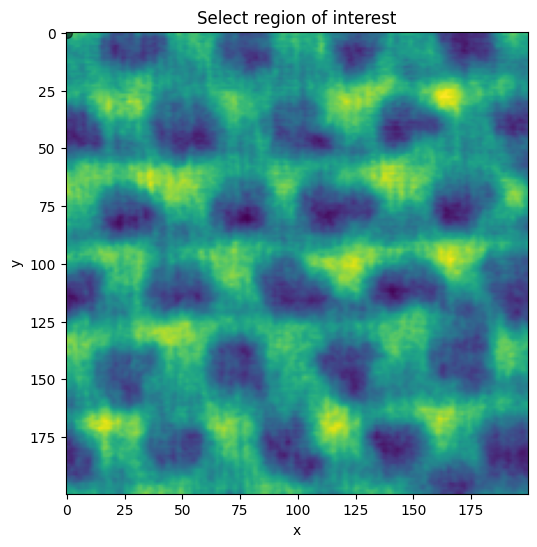

In [3]:
roi = plane.select_roi()

The `.bbox` attribute is updated when the selection above changes.

In [4]:
roi.bbox

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

Use the `.crop_to_roi` method to extract the region of interest.

<AxesSubplot:xlabel='x', ylabel='y'>

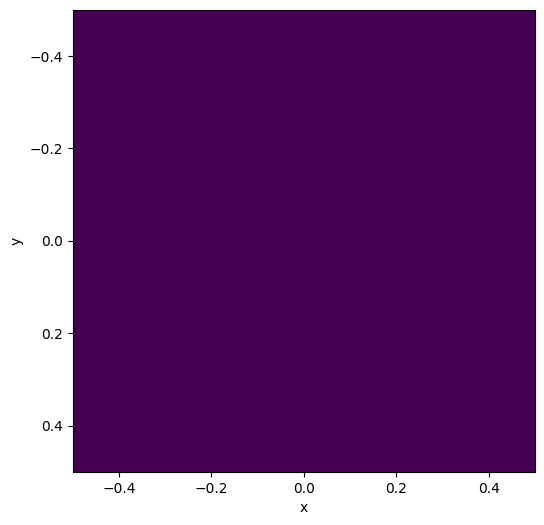

In [5]:
plane_roi = plane.crop_to_roi(bbox=roi.bbox)
plane_roi.show()

### Manual cropping

Alternatively, if you know which points to extract from the  to

Use the `minimum_bounding_rectangle` function to fit the smallest rectangle around the given points.

The example below demonstrates this on a slanted square. Well, almost, because the coordinates contain a small error to demonstrate the function.

In [6]:
from nanomesh.image import minimum_bounding_rectangle
import numpy as np

roi = np.array([
    [60, 60],
    [110, 110],
    [60, 145],  # <- should be 150
    [10, 110],
])

bbox = minimum_bounding_rectangle(roi)
bbox

array([[110., 110.],
       [ 60.,  60.],
       [ 10., 110.],
       [ 60., 160.]])

The bounding box (`bbox`) can then be used to extract this region from the image using `extract_rectangle`. If the bounding box is slanted, the image will be straightened using an Euclidean transform.

<AxesSubplot:xlabel='x', ylabel='y'>

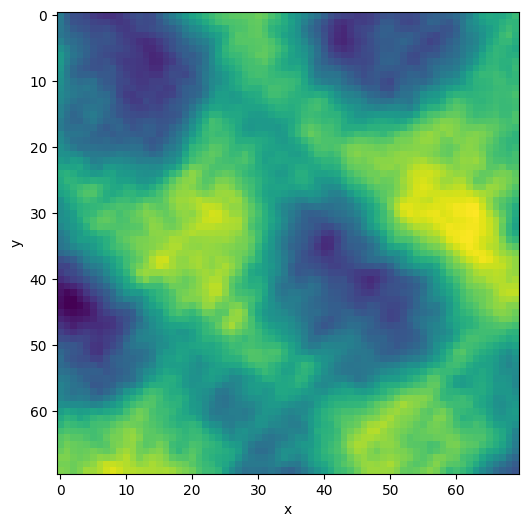

In [7]:
from nanomesh.image import extract_rectangle

cropped = plane.apply(extract_rectangle, bbox=bbox)
cropped.show()